<a href="https://colab.research.google.com/github/Jair-RM/Modelacion-Financiera/blob/main/Intentos_Red_Neuronal_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

¿Qué es load_digits?

Es un conjunto de imágenes de dígitos escritos a mano (del 0 al 9), donde cada imagen es de tamaño 8x8 píxeles (64 características en total por imagen).

# Cómo cargarlo:

In [ ]:
from sklearn.datasets import load_digits

# Cargar los datos
digits = load_digits()

# Entradas (imágenes aplanadas)
X = digits.data

# Salidas (etiquetas del 0 al 9)
y = digits.target

¿Qué significa cada parámetro?

In [ ]:
load_digits(n_class=10, return_X_y=False, as_frame=False)

#    n_class=10 ------> Número de clases a cargar (por defecto 10, para dígitos del 0 al 9).
#                       Puedes usar menos si quieres hacerlo más simple, por ejemplo, n_class=3
#                       cargará solo dígitos del 0 al 2.
#
#   return_X_y -------> Si True, retorna directamente (X, y) en lugar de un objeto tipo Bunch.
#
#   as_frame ---------> Si True, los datos se devuelven como un DataFrame de pandas.

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Ejemplo completo con red neuronal:

Aquí te va un ejemplo usando MLPClassifier (una red neuronal multicapa de Scikit-learn):

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar los datos
X, y = load_digits(return_X_y=True)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear red neuronal
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

# Entrenar
mlp.fit(X_train, y_train)

# Predecir
y_pred = mlp.predict(X_test)

# Evaluar
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[53  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  1  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  1  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 63  2  0  0  1]
 [ 1  0  0  0  0  1 51  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  1  0  0  0  0  0 39  1]
 [ 0  0  0  1  0  0  0  0  1 57]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.96      0.98      0.97        50
           2       0.98      1.00      0.99        47
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        60
           5       0.97      0.95      0.96        66
           6       0.96      0.96      0.96        53
           7       1.00      0.98      0.99        55
           8       0.93      0.91      0.92        43
           9       0.95      0.97      0.96        59

    accuracy                           0.97       540
   macro avg       

Vamos a adaptar el uso del dataset load_digits para usarlo con Keras (TensorFlow) y además vamos a visualizar algunas imágenes del conjunto de datos y cómo funciona la red.

# ✅ Paso 1: Cargar y visualizar los datos

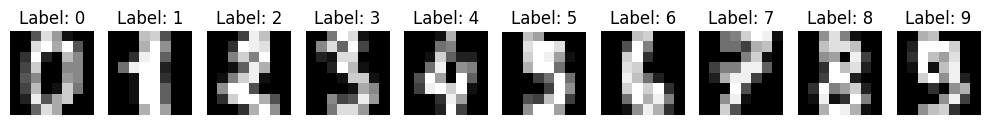

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Cargar el dataset
digits = load_digits()
X = digits.images  # imágenes 8x8
y = digits.target  # etiquetas (dígitos del 0 al 9)

# Mostrar los primeros 10 dígitos
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


# ✅ Paso 2: Preparar los datos para Keras

Keras espera que los datos estén en forma de matrices 2D o 3D (para imágenes).

Convertimos las imágenes 8x8 a matrices de entrada.

 También convertimos las etiquetas a one-hot encoding.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Normalizar valores (0-16) a (0-1)
X = X / 16.0

# Cambiar forma a (n_samples, 8, 8, 1) para usar CNN o (n_samples, 64) para MLP
X = X.reshape((X.shape[0], -1))  # MLP: 64 entradas

# One-hot encoding de las etiquetas
y_cat = to_categorical(y, num_classes=10)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)


# ✅ Paso 3: Crear y entrenar la red neuronal con Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir la red
model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # 10 clases (0-9)
])

# Compilar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1643 - loss: 2.2673 - val_accuracy: 0.3452 - val_loss: 1.9395
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4448 - loss: 1.8255 - val_accuracy: 0.6706 - val_loss: 1.4860
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7384 - loss: 1.3457 - val_accuracy: 0.7937 - val_loss: 1.0225
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8522 - loss: 0.9058 - val_accuracy: 0.8373 - val_loss: 0.7483
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8771 - loss: 0.6403 - val_accuracy: 0.8730 - val_loss: 0.5817
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9123 - loss: 0.4722 - val_accuracy: 0.8690 - val_loss: 0.4937
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9173 - loss: 0.3789 - val_accuracy: 0.8889 - val_loss: 0.4354
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9304 - loss: 0.3268 - val_accuracy: 0.8968 - val_loss

# ✅ Paso 4: Graficar el entrenamiento

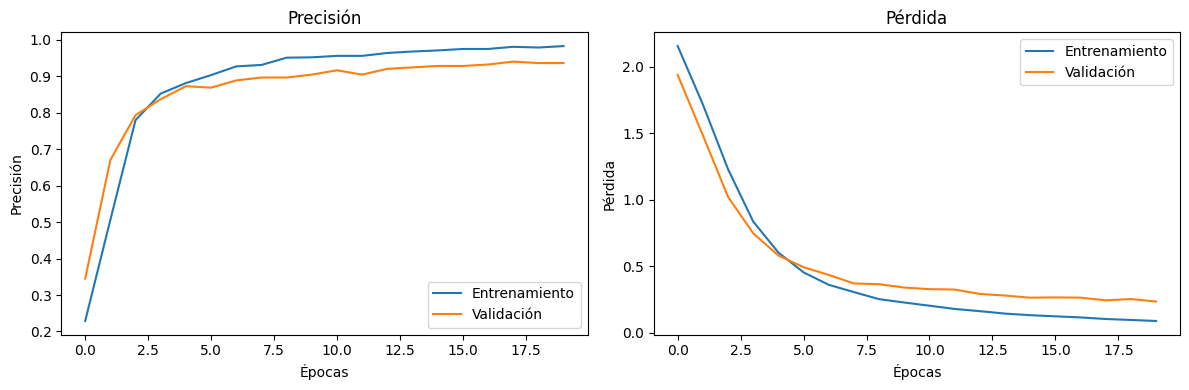

In [ ]:
# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


# ✅ Paso 5: Evaluar el modelo

In [ ]:
# Evaluar en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisión en datos de prueba: {test_acc:.4f}')


Precisión en datos de prueba: 0.9556


Mostrar las predicciones visualmente con colores es una excelente forma de ver cómo está funcionando tu red neuronal. Vamos a graficar algunas imágenes del conjunto de prueba junto con:

* Su etiqueta real

* Su predicción

Y usaremos colores para resaltar si la predicción fue correcta (verde) o incorrecta (rojo)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


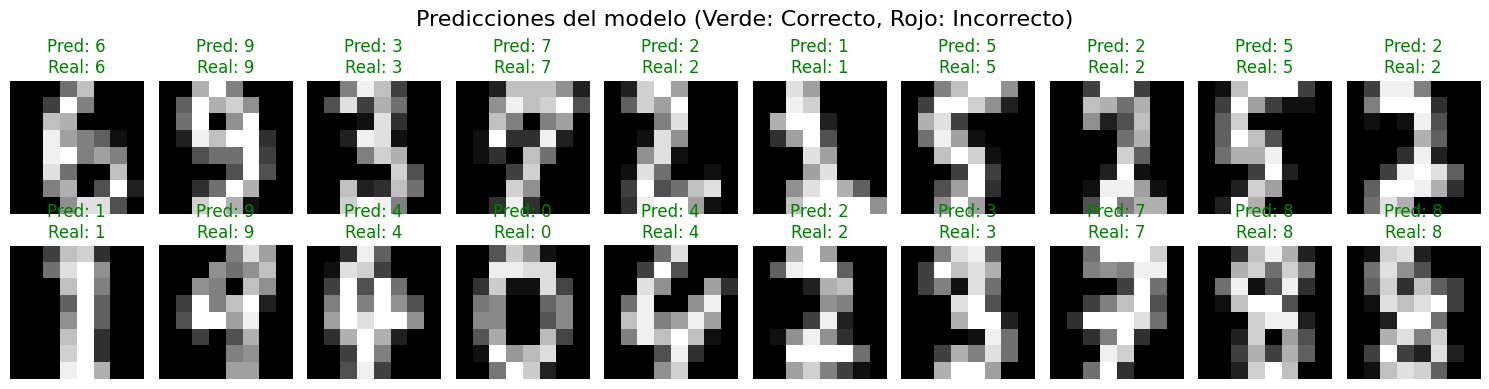

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Primero, reestructuramos las imágenes para graficarlas
X_test_imgs = X_test.reshape(-1, 8, 8)  # Volvemos a 8x8 para visualizar

# Realizamos predicciones
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Mostrar primeras 20 imágenes con predicción y color
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
fig.suptitle('Predicciones del modelo (Verde: Correcto, Rojo: Incorrecto)', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_imgs[i], cmap='gray')
    pred_label = y_pred_labels[i]
    true_label = y_true_labels[i]

    # Título con color
    color = 'green' if pred_label == true_label else 'red'
    ax.set_title(f'Pred: {pred_label}\nReal: {true_label}', color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()


La matriz de confusión visual es una herramienta para evaluar el rendimiento de un modelo de clasificación, como tu red neuronal. Es como una tabla que compara las etiquetas reales con las predicciones del modelo, y se puede mostrar como una imagen de calor (heatmap) para que sea más fácil de entender visualmente.



¿Cómo se lee?

Supongamos que tienes 10 clases (los dígitos del 0 al 9):

* Las filas son las clases reales (etiquetas verdaderas).

* Las columnas son las clases predichas por el modelo.

* Cada celda muestra cuántas veces el modelo predijo cierta clase cuando en realidad era otra.

Si el modelo fuera perfecto, solo verías valores grandes en la diagonal principal (de arriba a la izquierda hacia abajo a la derecha).


¿Para qué sirve?

Te permite ver qué clases se confunden entre sí. Por ejemplo, si tu modelo confunde el 8 con el 3, lo verás claramente.

Puedes usarla para decidir si necesitas más datos, ajustar la red, o cambiar la arquitectura.

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


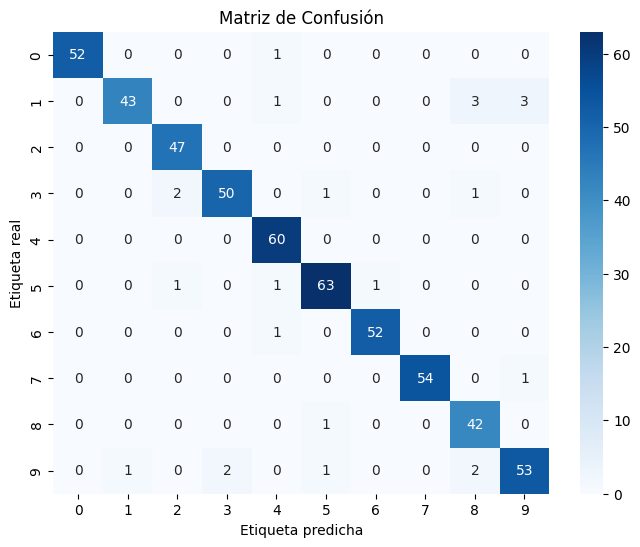

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener etiquetas reales y predichas
y_true = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(model.predict(X_test), axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')
plt.title('Matriz de Confusión')
plt.show()


¿Cómo interpretar esta tabla?

1. Diagonal principal = aciertos

* * Por ejemplo, la celda (9,9) tiene 53 → eso significa que 53 imágenes que eran un 9 fueron predichas correctamente como 9.

2. Fuera de la diagonal = errores

* * Por ejemplo, la celda (5,3) tiene 1 → eso quiere decir que una imagen que era un 5 fue mal clasificada como un 3.

3. Errores más comunes

* * Puedes ver si hay números que el modelo confunde seguido.

* * En el ejemplo, el modelo confundió algunas veces el 8 como un 5, y el 1 como un 8. Esto puede tener sentido si las formas escritas a mano se parecen mucho.

4.  Filas con errores = clases difíciles

* * Si una fila tiene muchos valores fuera de la diagonal, esa clase puede ser difícil de distinguir.

* * En este ejemplo, el dígito 1 tiene más errores que el 0, por ejemplo.

¿Qué hacer con esta info?
* Aumentar datos de las clases que el modelo confunde más.

* Aplicar data augmentation para que el modelo vea variantes de las imágenes.

* Usar una arquitectura más potente, como una red convolucional (CNN) que entiende mejor imágenes.

Vamos a mostrar solo los errores del modelo, es decir, aquellas imágenes del conjunto de prueba donde la predicción no coincidió con la etiqueta real.

Se mostrara:

* La imagen que el modelo falló

* La etiqueta real

* La etiqueta predicha

* Y usaremos colores rojos para el texto, indicando el error

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


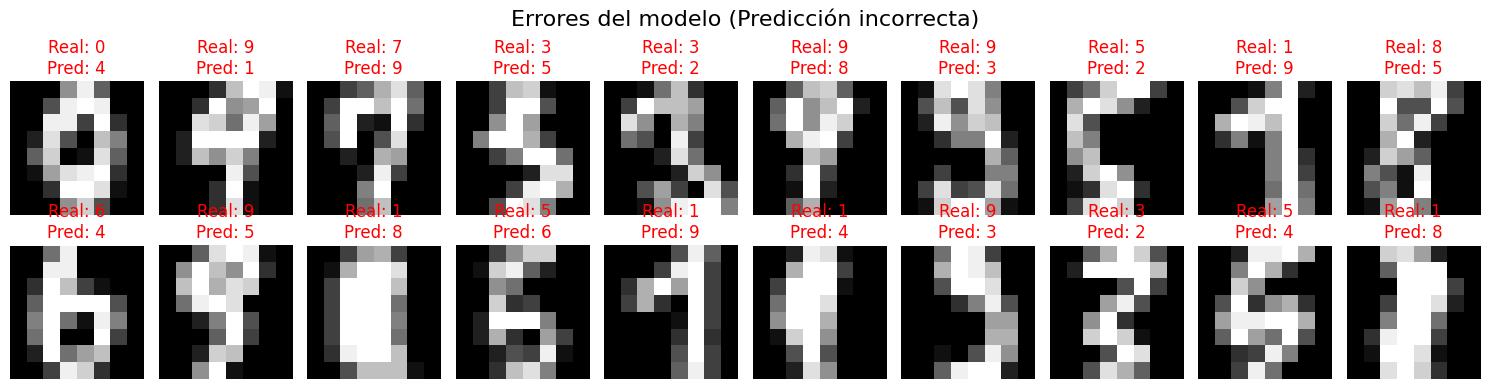

In [ ]:
# Código para visualizar solo los errores del modelo:
import numpy as np
import matplotlib.pyplot as plt

# Predecir y convertir a etiquetas
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Identificar los índices donde se cometieron errores
errores_idx = np.where(y_pred_labels != y_true_labels)[0]

# Mostrar hasta 20 errores
n_errores_a_mostrar = min(20, len(errores_idx))
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
fig.suptitle('Errores del modelo (Predicción incorrecta)', fontsize=16)

# Reconvertimos X_test para visualizar (8x8)
X_test_imgs = X_test.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat[:n_errores_a_mostrar]):
    idx = errores_idx[i]
    ax.imshow(X_test_imgs[idx], cmap='gray')
    ax.set_title(f'Real: {y_true_labels[idx]}\nPred: {y_pred_labels[idx]}', color='red')
    ax.axis('off')

plt.tight_layout()
plt.show()


¿Qué verás?
* Una fila de imágenes donde el modelo se equivocó.

* Encima de cada imagen aparecerá:

* * Real: la etiqueta verdadera

* * Pred: lo que la red neuronal predijo

* Todo en rojo para indicar que fue un error

Esto te ayuda a:

* Entender por qué el modelo falla

* Ver si algunas imágenes son ambiguas o confusas

* Detectar si el modelo necesita más entrenamiento, mejores datos o otra arquitectura

Una CNN entiende mejor las formas espaciales (como los bordes, líneas, curvas), lo cual es ideal para imágenes. A diferencia del MLP que trata las imágenes como un vector plano, la CNN mantiene la estructura 2D de la imagen.

# ✅ Paso 1: Preparar los datos para la CNN

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Cargar datos
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images  # (n_samples, 8, 8)
y = digits.target

# Normalizar: los valores van de 0 a 16
X = X / 16.0

# Cambiar forma a (n_samples, 8, 8, 1) para que lo acepte la CNN
X = X.reshape((-1, 8, 8, 1))

# One-hot encoding para etiquetas
y_cat = to_categorical(y, 10)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)


# ✅ Paso 2: Crear y entrenar la CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Crear modelo CNN
cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar
history_cnn = cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2804 - loss: 2.1638 - val_accuracy: 0.7540 - val_loss: 1.7295
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7793 - loss: 1.5386 - val_accuracy: 0.8492 - val_loss: 0.9337
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8412 - loss: 0.8248 - val_accuracy: 0.8968 - val_loss: 0.5178
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9038 - loss: 0.4614 - val_accuracy: 0.9206 - val_loss: 0.3667
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9456 - loss: 0.2974 - val_accuracy: 0.9246 - val_loss: 0.2878
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9374 - loss: 0.2516 - val_accuracy: 0.9167 - val_loss: 0.2548
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9463 - loss: 0.2148 - val_accuracy: 0.9325 - val_loss: 0.2230
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9700 - loss: 0.1597 - val_accuracy: 0.9246 - val_loss: 0.2237
Ep

# ✅ Paso 3: Evaluar y comparar resultados

In [ ]:
# Evaluar en el conjunto de prueba
test_loss_cnn, test_acc_cnn = cnn.evaluate(X_test, y_test, verbose=0)
print(f'Precisión de la CNN en datos de prueba: {test_acc_cnn:.4f}')


Precisión de la CNN en datos de prueba: 0.9704


# ✅ Paso 4: Visualizar errores de la CNN

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


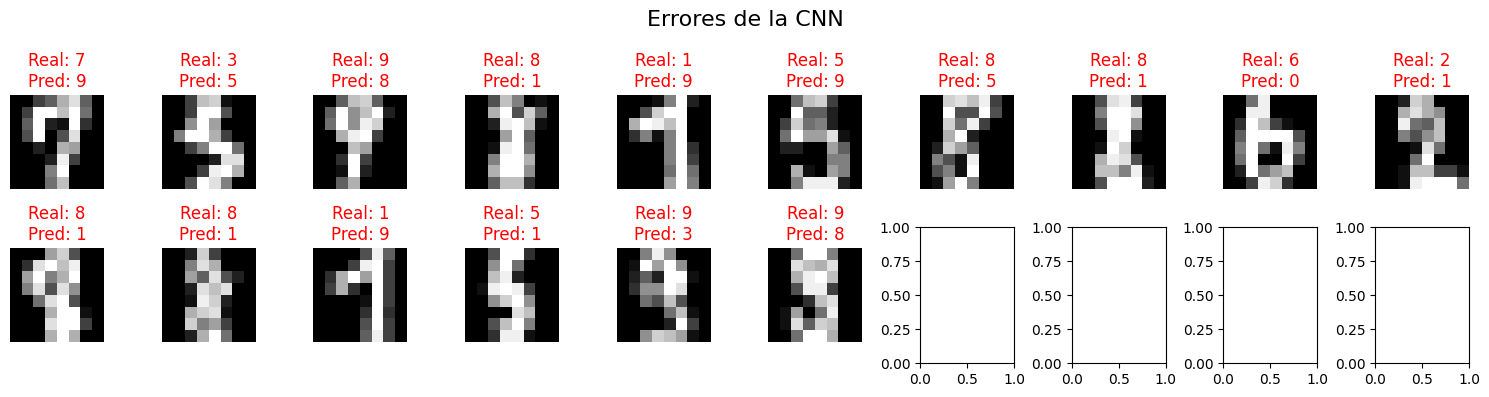

In [ ]:
# Obtener predicciones
y_pred_cnn = cnn.predict(X_test)
y_pred_labels_cnn = np.argmax(y_pred_cnn, axis=1)
y_true_labels_cnn = np.argmax(y_test, axis=1)

# Encontrar errores
errores_idx_cnn = np.where(y_pred_labels_cnn != y_true_labels_cnn)[0]

# Mostrar errores (hasta 20)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 10, figsize=(15, 4))
fig.suptitle('Errores de la CNN', fontsize=16)

for i, ax in enumerate(axes.flat[:min(20, len(errores_idx_cnn))]):
    idx = errores_idx_cnn[i]
    ax.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    ax.set_title(f'Real: {y_true_labels_cnn[idx]}\nPred: {y_pred_labels_cnn[idx]}', color='red')
    ax.axis('off')

plt.tight_layout()
plt.show()


Vamos a comparar visualmente las dos matrices de confusión: la de la MLP (red neuronal densa) y la de la CNN. Así podrás ver claramente:

* Cuáles dígitos se confundían antes y ya no se confunden

* Si la CNN reduce los errores

* En qué casos sigue teniendo problemas

# ✅ Paso 1: Matriz de confusión para la MLP

(ya la teniamos)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


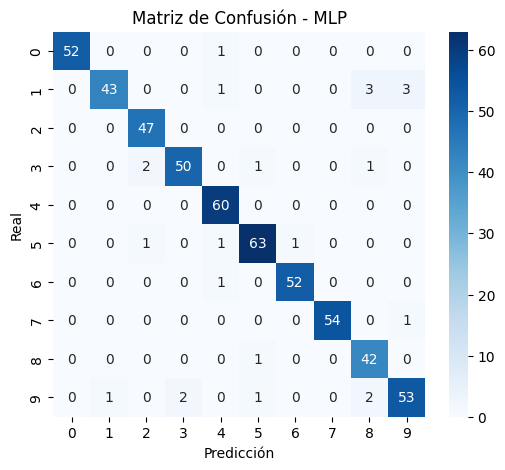

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Para la MLP
y_true_mlp = np.argmax(y_test, axis=1)
y_pred_mlp = np.argmax(model.predict(X_test.reshape(-1, 64)), axis=1)  # <- recuerda que X_test aquí es (n, 64)

cm_mlp = confusion_matrix(y_true_mlp, y_pred_mlp)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - MLP')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


# ✅ Paso 2: Matriz de confusión para la CNN

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


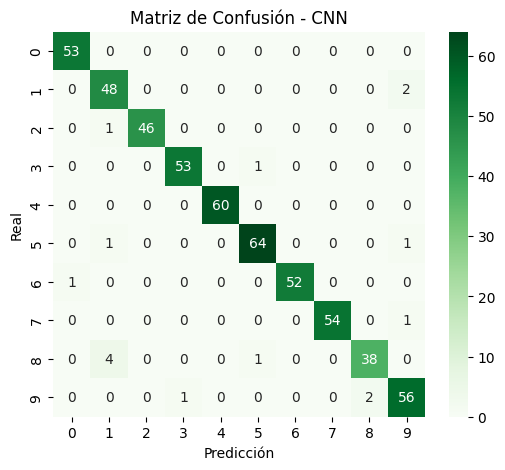

In [ ]:
# Para la CNN
y_true_cnn = np.argmax(y_test, axis=1)
y_pred_cnn = np.argmax(cnn.predict(X_test), axis=1)

cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - CNN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


# 🔍 Interpretación rápida:

* Más valores altos en la diagonal → mejor desempeño.

* Valores fuera de la diagonal → errores.

* Si la CNN tiene menos errores fuera de la diagonal que la MLP, entonces mejoró el desempeño.

# 🎯 ¿Y después?

Si quieres hacerlo aún más claro, puedo ayudarte a graficar ambas matrices una al lado de la otra con anotaciones, o incluso calcular:

* La cantidad total de errores

* Qué clases mejoraron más

* Qué clases siguen siendo difíciles

Vamos a hacer una comparación cuantitativa entre la MLP y la CNN basada en sus matrices de confusión. Esto incluirá:

# 📊 ¿Qué vamos a comparar?
1. Cantidad total de errores

2. Precisión general de cada modelo

3. Errores por clase (qué dígitos mejoraron más o menos)

4. Tabla resumen de diferencias

In [ ]:
# Código para comparar cuantitativamente:

import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# MLP - recordar que X_test para MLP tiene forma (n_samples, 64)
y_true_mlp = np.argmax(y_test, axis=1)
y_pred_mlp = np.argmax(model.predict(X_test.reshape(-1, 64)), axis=1)

# CNN
y_true_cnn = np.argmax(y_test, axis=1)
y_pred_cnn = np.argmax(cnn.predict(X_test), axis=1)

# Matrices de confusión
cm_mlp = confusion_matrix(y_true_mlp, y_pred_mlp)
cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)

# Precisión
acc_mlp = accuracy_score(y_true_mlp, y_pred_mlp)
acc_cnn = accuracy_score(y_true_cnn, y_pred_cnn)

print(f"Precisión MLP: {acc_mlp:.4f}")
print(f"Precisión CNN: {acc_cnn:.4f}")

# Total de errores
errores_mlp = np.sum(cm_mlp) - np.trace(cm_mlp)
errores_cnn = np.sum(cm_cnn) - np.trace(cm_cnn)

print(f"Errores MLP: {errores_mlp}")
print(f"Errores CNN: {errores_cnn}")

# Comparar errores por clase
errores_por_clase_mlp = np.sum(cm_mlp, axis=1) - np.diag(cm_mlp)
errores_por_clase_cnn = np.sum(cm_cnn, axis=1) - np.diag(cm_cnn)

# Mostrar tabla resumen
print("\nErrores por clase:")
print("Dígito | MLP | CNN | Diferencia")
print("-------------------------------")
for i in range(10):
    diff = errores_por_clase_mlp[i] - errores_por_clase_cnn[i]
    print(f"   {i}    | {errores_por_clase_mlp[i]:3d} | {errores_por_clase_cnn[i]:3d} | {diff:>+4d}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precisión MLP: 0.9556
Precisión CNN: 0.9704
Errores MLP: 24
Errores CNN: 16

Errores por clase:
Dígito | MLP | CNN | Diferencia
-------------------------------
   0    |   1 |   0 |   +1
   1    |   7 |   2 |   +5
   2    |   0 |   1 |   -1
   3    |   4 |   1 |   +3
   4    |   0 |   0 |   +0
   5    |   3 |   2 |   +1
   6    |   1 |   1 |   +0
   7    |   1 |   1 |   +0
   8    |   1 |   5 |   -4
   9    |   6 |   3 |   +3


# 🧠 ¿Cómo leer los resultados?

* La precisión más alta indica un mejor modelo en general.

* Menor número total de errores = mejor.

* En la tabla por clase:

* * Un número positivo en “Diferencia” = la CNN tuvo menos errores en ese dígito.

* * Un número negativo = la MLP fue mejor en ese caso (raro, pero puede pasar).

vamos a agregar una gráfica de barras para visualizar cómo cambiaron los errores por dígito entre la MLP y la CNN.

Así verás de un vistazo en qué números:

* Mejoró mucho

* Mejoró poquito

* O incluso si en alguno (raro) empeoró

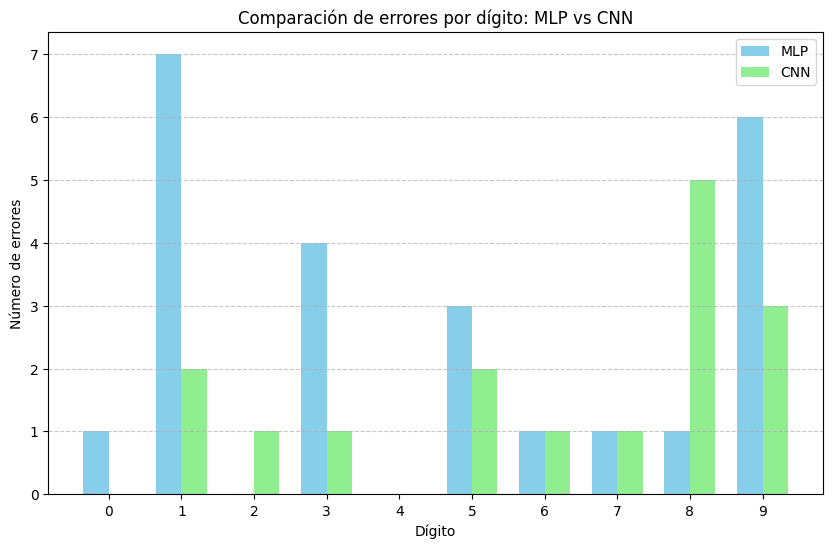

In [ ]:
#  Código para la gráfica de barras:

import matplotlib.pyplot as plt
import numpy as np

# Ya tenemos estos datos de antes:
# errores_por_clase_mlp
# errores_por_clase_cnn

dígitos = np.arange(10)

plt.figure(figsize=(10, 6))
bar_width = 0.35

# Barras para MLP
plt.bar(dígitos - bar_width/2, errores_por_clase_mlp, width=bar_width, label='MLP', color='skyblue')

# Barras para CNN
plt.bar(dígitos + bar_width/2, errores_por_clase_cnn, width=bar_width, label='CNN', color='lightgreen')

# Estética
plt.xlabel('Dígito')
plt.ylabel('Número de errores')
plt.title('Comparación de errores por dígito: MLP vs CNN')
plt.xticks(dígitos)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 🔍 Interpretación visual:
* Si la barra verde (CNN) es más baja que la azul (MLP), significa que la CNN mejora en ese dígito.

* Si la barra verde y azul están muy juntas, no hubo mucha mejora.

* Si alguna verde es más alta (raro), allí la CNN empeoró.